<a href="https://colab.research.google.com/github/Shradha-vid/MaternalHealthcareDataAnalysis/blob/main/AICIAIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving MSF_Dataset_Complete_450.xlsx to MSF_Dataset_Complete_450 (1).xlsx


In [ ]:
    import warnings
    warnings.simplefilter(action ="ignore")

    from collections import Counter
    import warnings
    warnings.filterwarnings("ignore")

    # Import the necessary packages
    import numpy as np
    import pandas as pd

    # Data visualization
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Algorithms
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier # Fixed typo here
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import precision_recall_fscore_support

    # Data directory
    import os


Data

In [ ]:
import pandas as pd

df = pd.read_excel("/content/MSF_Dataset_Complete_450.xlsx")

print(df.head())
print(df.describe())
print(df.isnull().sum())

   Mother_UID  Age_Of_Mother  Wt_before_P  Wt_before_D  Height(cm)  BMI  \
0           1             29           59         60.0         156   25   
1           2             24           54         56.0         145   26   
2           3             28           62         65.0         151   28   
3           4             25           49         52.0         151   22   
4           5             21           39         42.0         151   18   

   Hemoglobin  Menstrual_Cycle_BM  Menstrual_Cycle_AM  Travel_Time_AT  ...  \
0        12.5                   3                   3               2  ...   
1        12.5                   1                   1               2  ...   
2        11.5                   3                   3               2  ...   
3        11.5                   2                   2               2  ...   
4        10.1                   2                   2               2  ...   

   Stress_AM  Stress_DP  Happy  Depressed_BP  Depressed_BP.1  \
0          1    

In [ ]:
df

,Mother_UID,Age_Of_Mother,Wt_before_P,Wt_before_D,Height(cm),BMI,Hemoglobin,Menstrual_Cycle_BM,Menstrual_Cycle_AM,Travel_Time_AT,...,Stress_AM,Stress_DP,Happy,Depressed_BP,Depressed_BP.1,Time_Taken_To_Concieve,Family_Income,Weight_Baby_Kg,Hospital Stay in days,Hours_In_Labour
0,1,29,59,60.0,156,25,12.5,3,3,2,...,1,1,1,2,2,1,2,2.566,5,18
1,2,24,54,56.0,145,26,12.5,1,1,2,...,1,1,1,2,2,1,2,3.100,5,20
2,3,28,62,65.0,151,28,11.5,3,3,2,...,2,2,1,2,2,1,2,2.150,7,5
3,4,25,49,52.0,151,22,11.5,2,2,2,...,1,1,1,2,2,1,2,2.500,5,10
4,5,21,39,42.0,151,18,10.1,2,2,2,...,1,1,1,2,2,1,1,2.670,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,24,56,NaN,149,26,11.4,1,1,1,...,1,1,1,1,1,1,4,1.800,7,18
446,447,35,55,NaN,151,25,12.4,2,2,2,...,2,2,2,2,2,2,1,2.075,7,11
447,448,38,50,NaN,145,24,11.0,3,3,4,...,2,2,3,2,2,1,1,2.400,7,28
448,449,27,50,NaN,131,30,11.1,2,2,2,...,2,2,1,2,2,1,1,2.480,7,12


from matplotlib import pyplot as plt
df['Mother_UID'].plot(kind='hist', bins=20, title='Mother_UID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age_Of_Mother'].plot(kind='hist', bins=20, title='Age_Of_Mother')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Wt_before_P'].plot(kind='hist', bins=20, title='Wt_before_P')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Wt_before_D'].plot(kind='hist', bins=20, title='Wt_before_D')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Mother_UID', y='Age_Of_Mother', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age_Of_Mother', y='Wt_before_P', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Wt_before_P', y='Wt_before_D', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Wt_before_D', y='Height(cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mother_UID']
  ys = series['Age_Of_Mother']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Mother_UID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mother_UID')
_ = plt.ylabel('Age_Of_Mother')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mother_UID']
  ys = series['Wt_before_P']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Mother_UID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mother_UID')
_ = plt.ylabel('Wt_before_P')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mother_UID']
  ys = series['Wt_before_D']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Mother_UID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mother_UID')
_ = plt.ylabel('Wt_before_D')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mother_UID']
  ys = series['Height(cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Mother_UID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mother_UID')
_ = plt.ylabel('Height(cm)')

from matplotlib import pyplot as plt
df['Mother_UID'].plot(kind='line', figsize=(8, 4), title='Mother_UID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Age_Of_Mother'].plot(kind='line', figsize=(8, 4), title='Age_Of_Mother')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Wt_before_P'].plot(kind='line', figsize=(8, 4), title='Wt_before_P')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Wt_before_D'].plot(kind='line', figsize=(8, 4), title='Wt_before_D')
plt.gca().spines[['top', 'right']].set_visible(False)

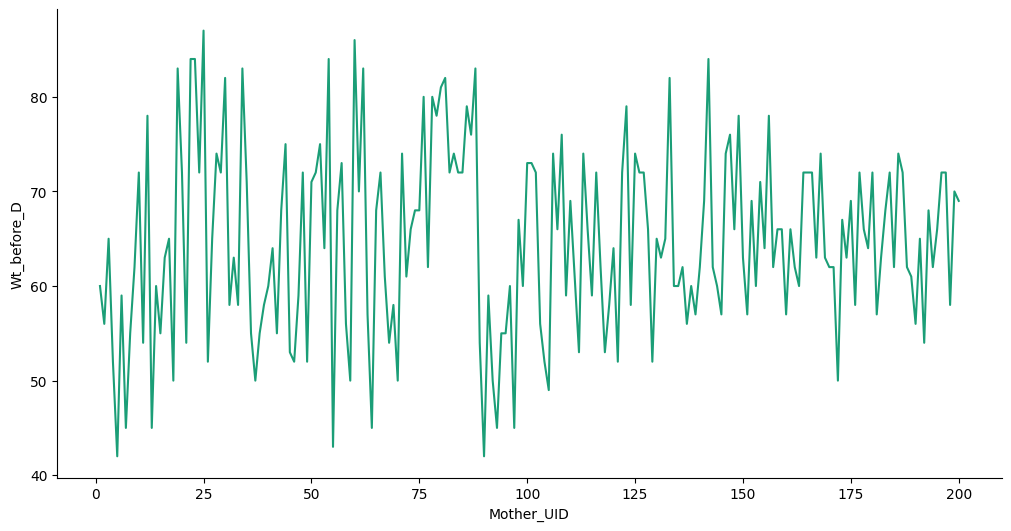

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mother_UID']
  ys = series['Wt_before_D']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Mother_UID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mother_UID')
_ = plt.ylabel('Wt_before_D')

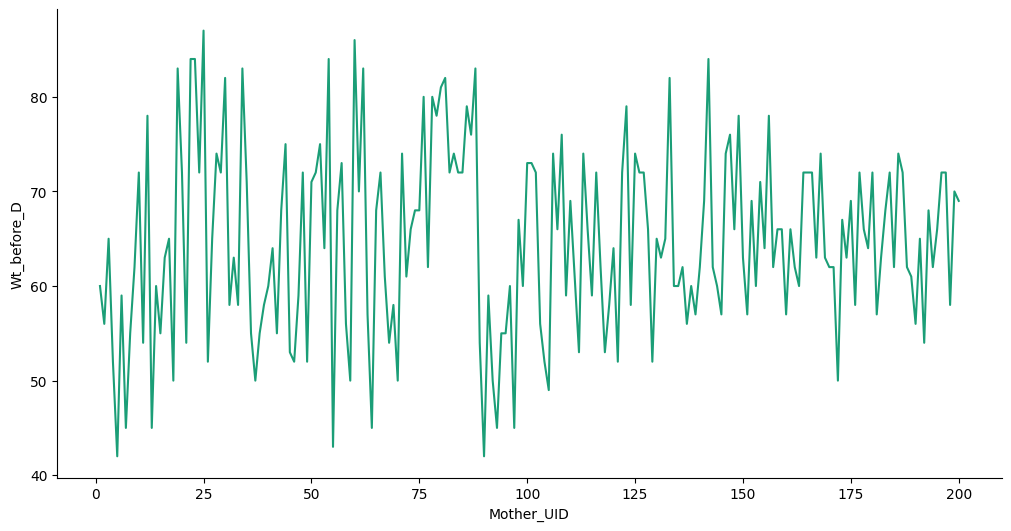

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Mother_UID']
  ys = series['Wt_before_D']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Mother_UID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Mother_UID')
_ = plt.ylabel('Wt_before_D')

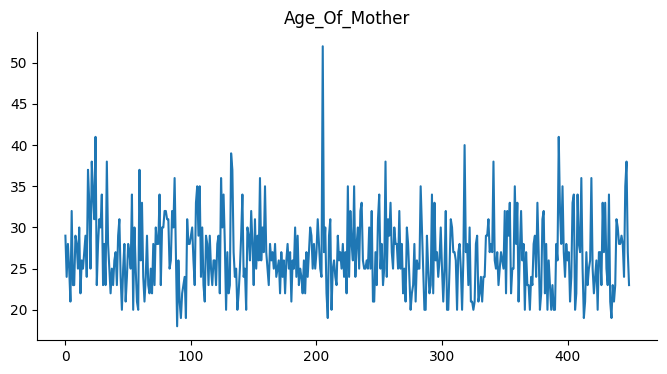

In [ ]:
from matplotlib import pyplot as plt
df['Age_Of_Mother'].plot(kind='line', figsize=(8, 4), title='Age_Of_Mother')
plt.gca().spines[['top', 'right']].set_visible(False)

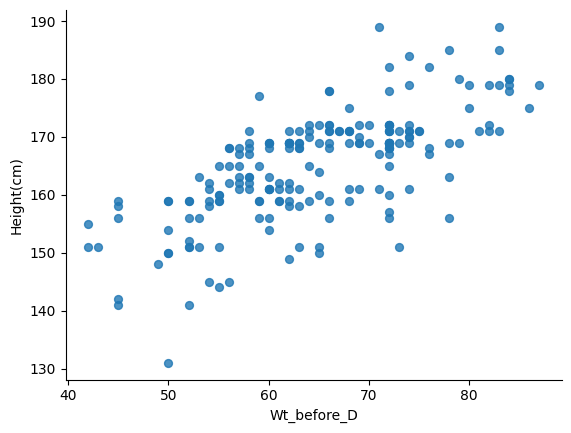

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Wt_before_D', y='Height(cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

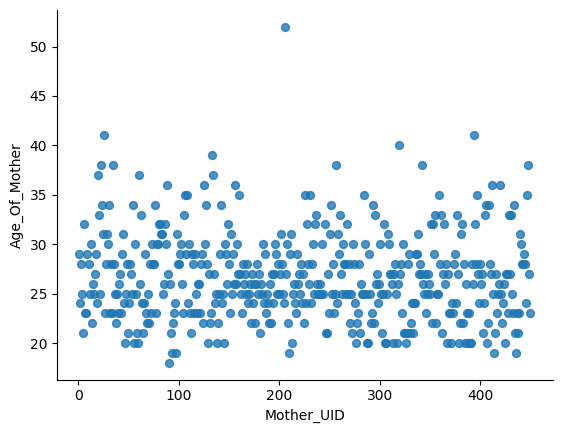

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Mother_UID', y='Age_Of_Mother', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

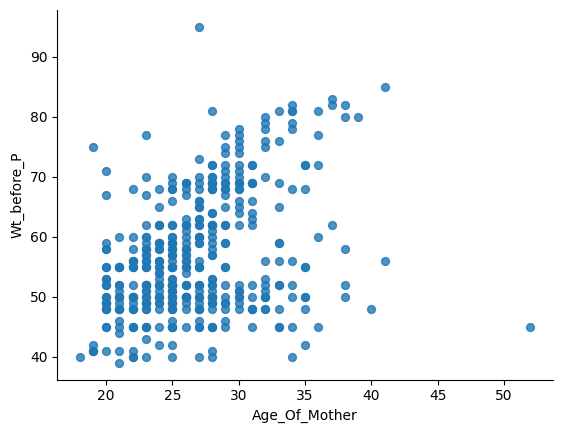

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age_Of_Mother', y='Wt_before_P', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

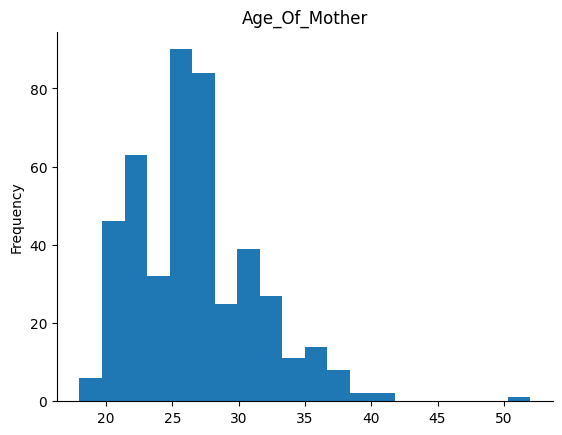

In [ ]:
from matplotlib import pyplot as plt
df['Age_Of_Mother'].plot(kind='hist', bins=20, title='Age_Of_Mother')
plt.gca().spines[['top', 'right',]].set_visible(False)

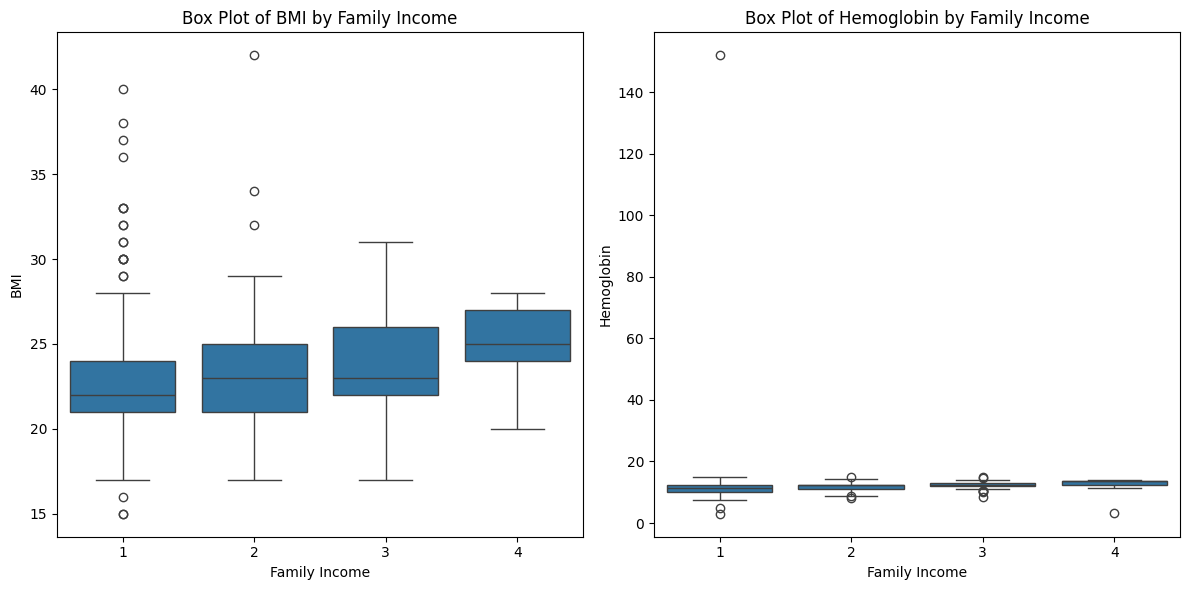

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))

# Box plot for BMI
plt.subplot(1, 2, 1)
sns.boxplot(x='Family_Income', y='BMI', data=df)
plt.title('Box Plot of BMI by Family Income')
plt.xlabel('Family Income')
plt.ylabel('BMI')

# Box plot for Hemoglobin
plt.subplot(1, 2, 2)
sns.boxplot(x='Family_Income', y='Hemoglobin', data=df)
plt.title('Box Plot of Hemoglobin by Family Income')
plt.xlabel('Family Income')
plt.ylabel('Hemoglobin')

plt.tight_layout()
plt.show()

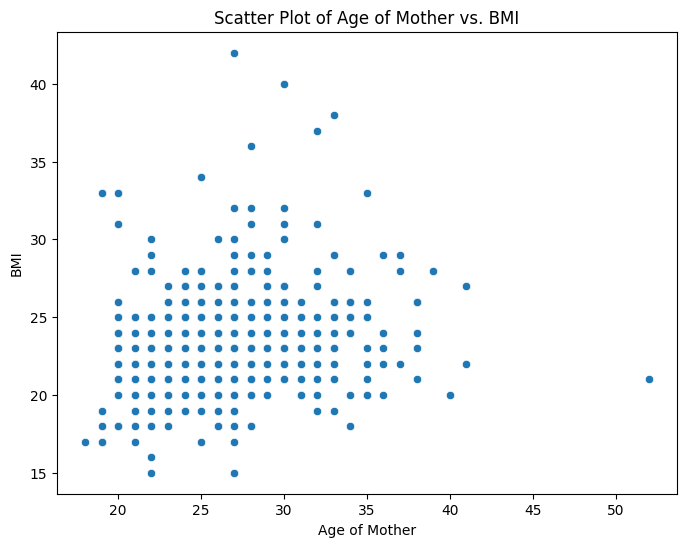

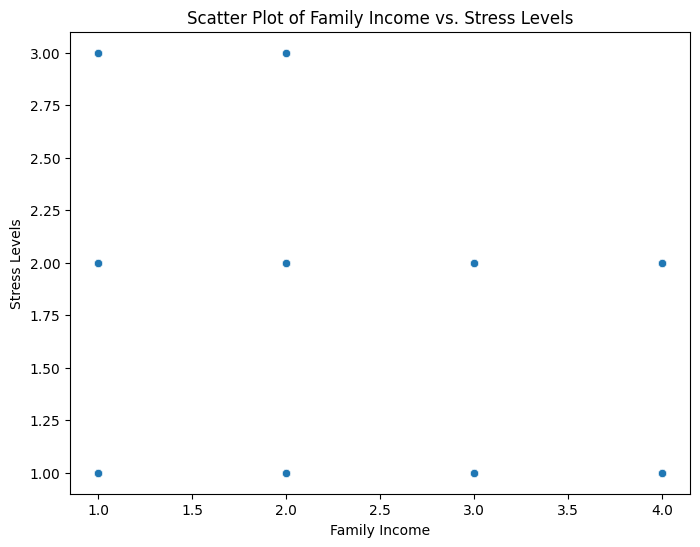

In [ ]:
# Scatter plot for Age vs. BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age_Of_Mother', y='BMI', data=df)
plt.title('Scatter Plot of Age of Mother vs. BMI')
plt.xlabel('Age of Mother')
plt.ylabel('BMI')
plt.show()

# Scatter plot for Family Income vs. Stress Levels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Family_Income', y='Stress_DP', data=df)
plt.title('Scatter Plot of Family Income vs. Stress Levels')
plt.xlabel('Family Income')
plt.ylabel('Stress Levels')
plt.show()

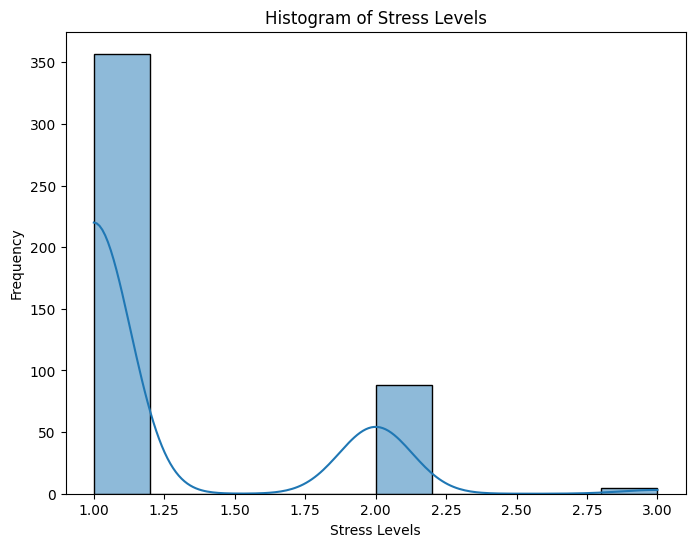

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Stress_DP'], bins=10, kde=True)
plt.title('Histogram of Stress Levels')
plt.xlabel('Stress Levels')
plt.ylabel('Frequency')
plt.show()

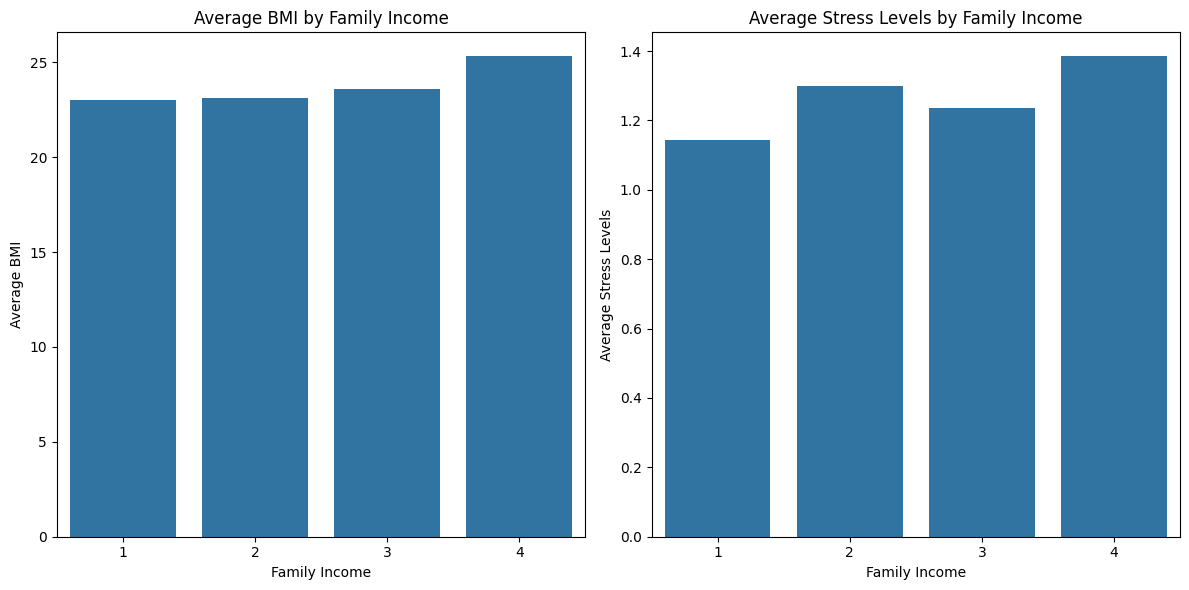

In [ ]:
# Calculate average BMI and Stress Levels by Family Income
avg_metrics = df.groupby('Family_Income').agg({'BMI': 'mean', 'Stress_DP': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))

# Bar chart for average BMI
plt.subplot(1, 2, 1)
sns.barplot(x='Family_Income', y='BMI', data=avg_metrics)
plt.title('Average BMI by Family Income')
plt.xlabel('Family Income')
plt.ylabel('Average BMI')

# Bar chart for average Stress Levels
plt.subplot(1, 2, 2)
sns.barplot(x='Family_Income', y='Stress_DP', data=avg_metrics)
plt.title('Average Stress Levels by Family Income')
plt.xlabel('Family Income')
plt.ylabel('Average Stress Levels')

plt.tight_layout()
plt.show()

Linear Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

target = 'Stress_DP'
features = df[['Age_Of_Mother', 'BMI', 'Hemoglobin','Menstrual_Cycle_AM','Hours_In_Labour']]
target = df[target]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

y_pred_train = linear_regressor.predict(X_train_scaled)
y_pred_test = linear_regressor.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("\nLinear Regression Model Performance:")
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")
print(f"Training R2 Score: {r2_train}")
print(f"Testing R2 Score: {r2_test}")



Linear Regression Model Performance:
Training MSE: 0.16636956220438442
Testing MSE: 0.218399582751503
Training R2 Score: 0.08385403604469
Testing R2 Score: 0.06941787465167049


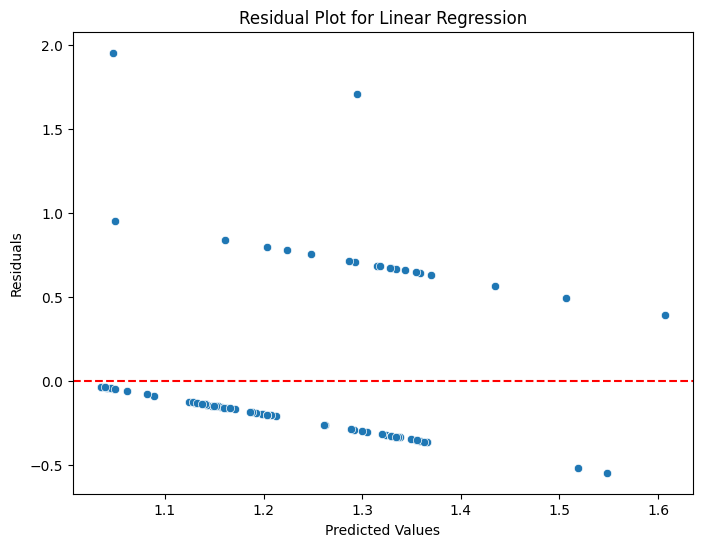

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_test

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

file_path = "/content/MSF_Dataset_Complete_450.xlsx"
df = pd.read_excel(file_path)

features = df[['Age_Of_Mother', 'BMI', 'Hemoglobin', 'Menstrual_Cycle_AM', 'Hours_In_Labour']]
target = df['Stress_DP']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

probabilities_train = log_reg.predict_proba(X_train_scaled)[:, 1]
predictions_train = log_reg.predict(X_train_scaled)
probabilities_test = log_reg.predict_proba(X_test_scaled)[:, 1]
predictions_test = log_reg.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train, predictions_train)
accuracy_test = accuracy_score(y_test, predictions_test)
conf_matrix = confusion_matrix(y_test, predictions_test)

print("Logistic Regression Predictions: ")
print("Train Probabilities First 10: ", probabilities_train[:10])
print("Train Predictions First 10: ", predictions_train[:10])
print("Test Probabilities First 10: ", probabilities_test[:10])
print("Test Predictions First 10: ", predictions_test[:10])
print("Train Accuracy: ", accuracy_train)
print("Test Accuracy: ", accuracy_test)
print("Confusion Matrix:\n", conf_matrix)


Logistic Regression Predictions: 
Train Probabilities First 10:  [0.43822965 0.30003327 0.15511466 0.15110897 0.13057928 0.19337126
 0.11837432 0.13603743 0.11145252 0.05270416]
Train Predictions First 10:  [1 1 1 1 1 1 1 1 1 1]
Test Probabilities First 10:  [0.11753486 0.12420384 0.28969743 0.19399486 0.13295577 0.21235401
 0.05277545 0.76049783 0.1455795  0.05926968]
Test Predictions First 10:  [1 1 1 1 1 1 1 2 1 1]
Train Accuracy:  0.8027777777777778
Test Accuracy:  0.7666666666666667
Confusion Matrix:
 [[67  2  0]
 [17  2  0]
 [ 2  0  0]]


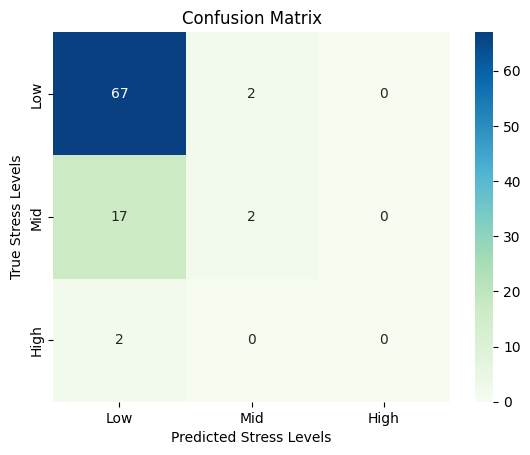

In [ ]:
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax, cmap = "GnBu");

ax.set_xlabel("Predicted Stress Levels");
ax.set_ylabel("True Stress Levels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Low", "Mid", "High"]);
ax.yaxis.set_ticklabels(["Low", "Mid", "High"]);

KNN Classifiers

In [ ]:
x = df[['Age_Of_Mother', 'BMI', 'Hemoglobin','Menstrual_Cycle_AM','Hours_In_Labour']]  # Replace 'target_column' with the actual column name
y = df['Stress_DP']

# Step 3: Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn_mod = knn.fit(x_train, y_train)
print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(x_test, y_test), 3)}")
pred_knn = knn_mod.predict(x_test)
# Cross validate K-Nearest Neighbors model
scores_knn = cross_val_score(knn, x_train, y_train, cv=3, scoring="accuracy")
print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}")
print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")
params_knn = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p": [1,2],
              "weights": ["uniform", "distance"],
             }
GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=params_knn,
                                cv=3,
                                scoring="accuracy",
                                return_train_score=True
                                )
# Fit model with train data
GridSearchCV_knn.fit(x_train, y_train);
print(f"Best estimator for KNN model:\n{GridSearchCV_knn.best_estimator_}")
print(f"Best parameter values:\n{GridSearchCV_knn.best_params_}")
print(f"Best score for GNB model: {round(GridSearchCV_knn.best_score_, 3)}")

Baseline K-Nearest Neighbors: 0.7
Scores(Cross validate) for K-Nearest Neighbors model:
[0.79166667 0.79166667 0.75      ]
CrossValMeans: 0.778
CrossValStandard Deviation: 0.02
Best estimator for KNN model:
KNeighborsClassifier(leaf_size=15, n_neighbors=13, p=1)
Best parameter values:
{'leaf_size': 15, 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}
Best score for GNB model: 0.808


In [ ]:
print("Classification Report")
print(classification_report(y_test, pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

           1       0.77      0.87      0.82        69
           2       0.25      0.16      0.19        19
           3       0.00      0.00      0.00         2

    accuracy                           0.70        90
   macro avg       0.34      0.34      0.34        90
weighted avg       0.64      0.70      0.67        90

Confusion Matrix:
[[60  9  0]
 [16  3  0]
 [ 2  0  0]]


Random Forest

In [ ]:
# Baseline model of Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(x_train, y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(x_test, y_test), 3)}")
pred_random_forest = random_forest_mod.predict(x_test)
# Cross validate Random Forest Classifier model
scores_RF = cross_val_score(random_forest, x_train, y_train, cv=3, scoring = "accuracy")
print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 2, 4],
              "n_estimators" :[50,100,200,300,400],
              "max_depth": [None, 10, 20, 30],
              "criterion": ["gini", "entropy"]
              }
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid=params_RF,
                                cv=3,
                                scoring="accuracy",
                                return_train_score=True
                                )
# Fit model with train data
GridSearchCV_RF.fit(x_train, y_train);
print(f"Best estimator for RF model:\n{GridSearchCV_RF.best_estimator_}")
print(f"Best parameter values for RF model:\n{GridSearchCV_RF.best_params_}")
print(f"Best score for RF model: {round(GridSearchCV_RF.best_score_, 3)}")

# Test with new parameter
random_forest = RandomForestClassifier(criterion="entropy", max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
random_forest_mod = random_forest.fit(x_train, y_train)
pred_random_forest = random_forest_mod.predict(x_test)

mse_random_forest = mean_squared_error(y_test, pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, pred_random_forest))
score_random_forest_train = random_forest_mod.score(x_train, y_train)
score_random_forest_test = random_forest_mod.score(x_test, y_test)
print(f"Mean Square Error for Random Forest = {round(mse_random_forest, 3)}")
print(f"Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")
print("Classification Report")
print(classification_report(y_test, pred_random_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_random_forest))

Baseline Random Forest: 0.711
Scores(Cross validate) for Random forest model:
[0.74166667 0.79166667 0.75      ]
CrossValMeans: 0.761
CrossValStandard Deviation: 0.022
Best estimator for RF model:
RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=20,
                       n_estimators=200)
Best parameter values for RF model:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 200}
Best score for RF model: 0.8
Mean Square Error for Random Forest = 0.322
Root Mean Square Error for Random Forest = 0.568
R^2(coefficient of determination) on training set = 1.0
R^2(coefficient of determination) on testing set = 0.711
Classification Report
              precision    recall  f1-score   support

           1       0.78      0.90      0.83        69
           2       0.20      0.11      0.14        19
           3       0.00      0.00      0.00         2

    accuracy                           0.71        90
   macro a

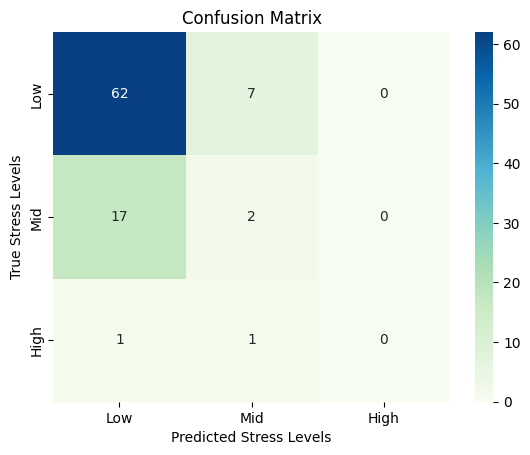

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_random_forest), annot=True, ax = ax, cmap = "GnBu");

ax.set_xlabel("Predicted Stress Levels");
ax.set_ylabel("True Stress Levels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Low", "Mid", "High"]);
ax.yaxis.set_ticklabels(["Low", "Mid", "High"]);

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

target = 'Stress_DP'
features = df[['Age_Of_Mother', 'BMI', 'Hemoglobin','Menstrual_Cycle_AM','Hours_In_Labour']]
target = df[target]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_scaled, y_train)

y_pred_train = gb_classifier.predict(X_train_scaled)
y_pred_test = gb_classifier.predict(X_test_scaled)

print("\nGradient Boosting Classifier Performance:")
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Testing Classification Report:")
print(classification_report(y_test, y_pred_test))

print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))



Gradient Boosting Classifier Performance:
Training Classification Report:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       288
           2       1.00      0.74      0.85        69
           3       1.00      1.00      1.00         3

    accuracy                           0.95       360
   macro avg       0.98      0.91      0.94       360
weighted avg       0.95      0.95      0.95       360

Testing Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.87      0.82        69
           2       0.17      0.11      0.13        19
           3       0.00      0.00      0.00         2

    accuracy                           0.69        90
   macro avg       0.31      0.32      0.32        90
weighted avg       0.62      0.69      0.65        90

Training Confusion Matrix:
[[288   0   0]
 [ 18  51   0]
 [  0   0   3]]
Testing Confusion Matrix:
[[60  9  0]
 [17  2  0]
 [ 1  1  

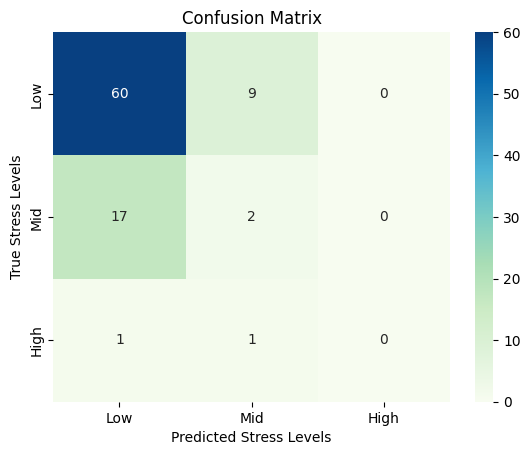

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, ax = ax, cmap = "GnBu");

ax.set_xlabel("Predicted Stress Levels");
ax.set_ylabel("True Stress Levels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Low", "Mid", "High"]);
ax.yaxis.set_ticklabels(["Low", "Mid", "High"]);

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Assuming the models are defined as follows:
logistic_regression_mod = LogisticRegression()
linear_regression_mod = LinearRegression()
knn_mod = KNeighborsClassifier()
random_forest_mod = RandomForestClassifier()
gbc_mod = GradientBoostingClassifier()

# Fit the models to the training data
logistic_regression_mod.fit(X_train, y_train)
linear_regression_mod.fit(X_train, y_train)
knn_mod.fit(X_train, y_train)
random_forest_mod.fit(X_train, y_train)
gbc_mod.fit(X_train, y_train)

# Create a DataFrame to store model evaluation results
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Linear Regression", "K-Nearest Neighbors", "Random Forest", "Gradient Boosting Classifier"],
    "Train Score": [
        cross_val_score(logistic_regression_mod, X_train, y_train, cv=3).mean(),
        cross_val_score(linear_regression_mod, X_train, y_train, cv=3).mean(),
        cross_val_score(knn_mod, X_train, y_train, cv=3).mean(),
        cross_val_score(random_forest_mod, X_train, y_train, cv=3).mean(),
        cross_val_score(gbc_mod, X_train, y_train, cv=3).mean(),
    ],
    "Test Score": [
        logistic_regression_mod.score(X_test, y_test),
        linear_regression_mod.score(X_test, y_test),
        knn_mod.score(X_test, y_test),
        random_forest_mod.score(X_test, y_test),
        gbc_mod.score(X_test, y_test),
    ]
})

# Additional Metrics (precision, recall, F1 score) for classification models only
classification_models = [logistic_regression_mod, knn_mod, random_forest_mod, gbc_mod]
classification_model_names = ["Logistic Regression", "K-Nearest Neighbors", "Random Forest", "Gradient Boosting Classifier"]

metrics = ["precision", "recall", "f1"]
for metric in metrics:
    results[f"{metric.capitalize()}"] = [
        precision_recall_fscore_support(y_test, model.predict(X_test), average="weighted")[metrics.index(metric)]
        if model_name in classification_model_names else None
        for model, model_name in zip([logistic_regression_mod, linear_regression_mod, knn_mod, random_forest_mod, gbc_mod], results["Model"])
    ]

result_df = results.sort_values(by="Test Score", ascending=False)
result_df = result_df.set_index("Test Score")
result_df


,Model,Train Score,Precision,Recall,F1
Test Score,,,,,
0.766667,Logistic Regression,0.794444,0.702842,0.766667,0.699511
0.700000,K-Nearest Neighbors,0.777778,0.642521,0.700000,0.666711
0.688889,Random Forest,0.761111,0.605694,0.688889,0.642300
0.688889,Gradient Boosting Classifier,0.758333,0.624929,0.688889,0.653090
0.069418,Linear Regression,-0.042708,NaN,NaN,NaN


from matplotlib import pyplot as plt
_df_0['Test Score'].plot(kind='hist', bins=20, title='Test Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Train Score'].plot(kind='hist', bins=20, title='Train Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Test Score', y='Train Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Train Score', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Recall', y='F1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Test Score'].plot(kind='line', figsize=(8, 4), title='Test Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Train Score'].plot(kind='line', figsize=(8, 4), title='Train Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Test Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Train Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

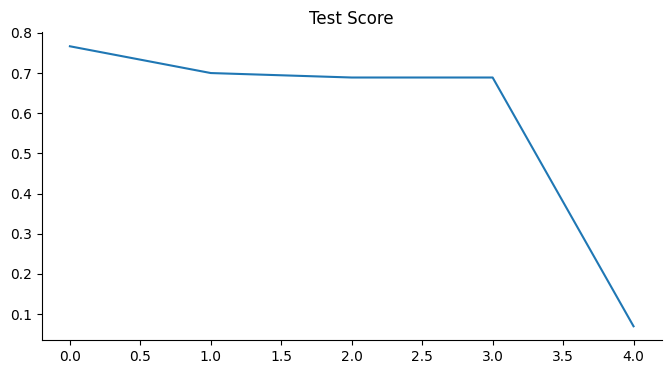

In [ ]:
from matplotlib import pyplot as plt
_df_9['Test Score'].plot(kind='line', figsize=(8, 4), title='Test Score')
plt.gca().spines[['top', 'right']].set_visible(False)

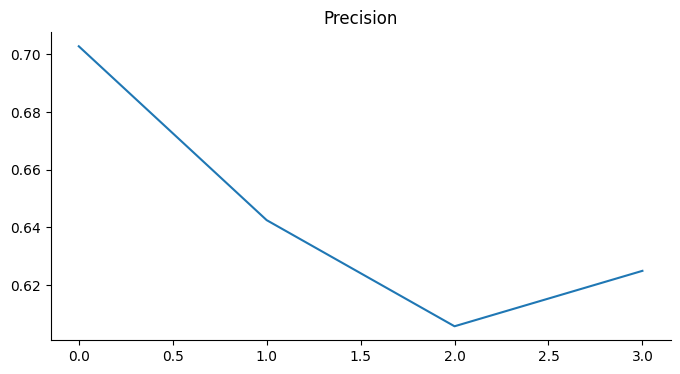

In [ ]:
from matplotlib import pyplot as plt
_df_11['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

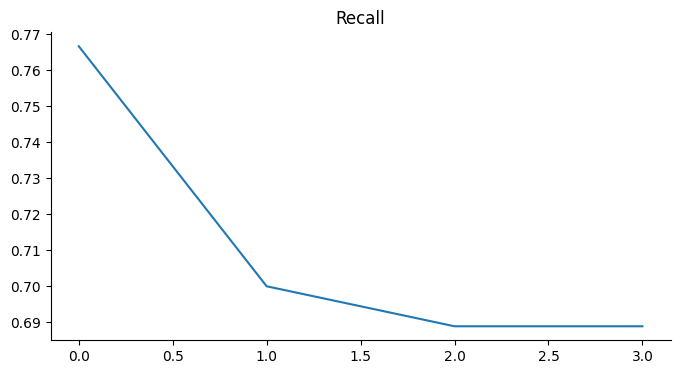

In [ ]:
from matplotlib import pyplot as plt
_df_12['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)